# Домашнее задание №7. И снова Pandas
Задания опираются на материалы лекции.

In [22]:
import pandas as pd
movies = pd.read_csv("movies_metadata.csv")
ratings = pd.read_csv("ratings_small.csv")

C:\Users\anani\AppData\Local\Temp\ipykernel_14592\3908799901.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("movies_metadata.csv")


## Задание 1
Определите, сколько фильмов в датасете с незаполненным бюджетом (0 или nan).

In [23]:
# Напишите свой код в данной ячейке

movies['budget'][(movies['budget'].isna()) | (movies['budget'] == "0")].count()

36573

## Задание 2
Как изменится поведение модели предсказания рейтинга по бюджету и популярности, если убрать все объекты с нулями?

In [24]:
from sklearn.model_selection import train_test_split

movies.id = pd.to_numeric(movies.id, errors='coerce').astype('Int64')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce').astype('Int64')
data = pd.merge(ratings, movies, left_on='movieId', right_on='id')

data = data.dropna()
data = data[data['budget'] != 0]

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity_to_budget'] = data['popularity'] / (data['budget'] + 1)

# Определим признаки и целевую переменную
X = data[['budget', 'runtime', 'popularity_to_budget']]
y = data['rating']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание и оценка качества
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9591412843815939


## Задание 3
Оставьте в оценках по фильму только среднюю оценку фильма, а не все оценки. Сделайте мердж, предсказывайте оценку, как в примере на лекции. Как изменится поведение модели?

In [26]:
# Напишите свой код в данной ячейке

ratings_grouped = ratings.groupby('movieId')['rating'].agg('mean')
ratings_grouped


movieId
1         3.872470
2         3.401869
3         3.161017
4         2.384615
5         3.267857
            ...   
161944    5.000000
162376    4.500000
162542    5.000000
162672    3.000000
163949    5.000000
Name: rating, Length: 9066, dtype: float64

In [27]:
data = pd.merge(ratings_grouped, movies, left_on='movieId', right_on='id')

data = data.dropna()
data = data[data['budget'] != 0]

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity_to_budget'] = data['popularity'] / (data['budget'] + 1)

# Определим признаки и целевую переменную
X = data[['budget', 'runtime', 'popularity_to_budget']]
y = data['rating']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Инициализация и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание и оценка качества
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4657577098340912


## Задание 4
Найдите все фильмы, которые были выпущены в тот же год, что и Матрица, имеют длину фильма в диапазоне +- 20 минут от длительности фильма Матрица.

In [29]:
# Напишите свой код в данной ячейке
data = pd.merge(ratings, movies, left_on='movieId', right_on='id')

matrix = movies[movies['title'] == 'The Matrix']
matrix_year = matrix['release_date'].values[0][:4]
matrix_length = float(matrix['runtime'].values[0])

task4 = data[(data['release_date'].str.contains(matrix_year)) & ((matrix_length - 20) <= data['runtime']) & (data['runtime'] <= (matrix_length + 20))]
task4


,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4437,2,509,4.0,835355719,False,NaN,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.notting-hill.com/,509,...,1999-05-13,363889678.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Can the most famous film star in the world fal...,Notting Hill,False,7.0,1309.0
4438,15,509,2.0,1093028389,False,NaN,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.notting-hill.com/,509,...,1999-05-13,363889678.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Can the most famous film star in the world fal...,Notting Hill,False,7.0,1309.0
4439,19,509,4.0,855194216,False,NaN,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.notting-hill.com/,509,...,1999-05-13,363889678.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Can the most famous film star in the world fal...,Notting Hill,False,7.0,1309.0
4440,21,509,4.0,853846612,False,NaN,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.notting-hill.com/,509,...,1999-05-13,363889678.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Can the most famous film star in the world fal...,Notting Hill,False,7.0,1309.0
4441,23,509,4.5,1148672198,False,NaN,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.notting-hill.com/,509,...,1999-05-13,363889678.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Can the most famous film star in the world fal...,Notting Hill,False,7.0,1309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43806,311,603,3.0,898008162,False,"{'id': 2344, 'name': 'The Matrix Collection', ...",63000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.warnerbros.com/matrix,603,...,1999-03-30,463517383.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the Real World.,The Matrix,False,7.9,9079.0
44222,405,4806,4.0,1061360229,False,NaN,70000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,4806,...,1999-07-30,309457509.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Catch her if you can.,Runaway Bride,False,5.8,472.0
44223,587,4806,3.5,1112401005,False,NaN,70000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,4806,...,1999-07-30,309457509.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Catch her if you can.,Runaway Bride,False,5.8,472.0
44626,518,564,3.0,945365440,False,"{'id': 1733, 'name': 'The Mummy Collection', '...",80000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mummyvideo.com/,564,...,1999-04-16,415885488.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The legend you know. The adventure you have ye...,The Mummy,False,6.6,2796.0


## Задание 5
Визуализируйте информацию о числе оценок и о средей оценке пользователей о фильме, но только среди фильмом из предыдущего пункта.

C:\Users\anani\AppData\Local\Temp\ipykernel_14592\3963183611.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies.values, y=top_movies, palette="viridis")


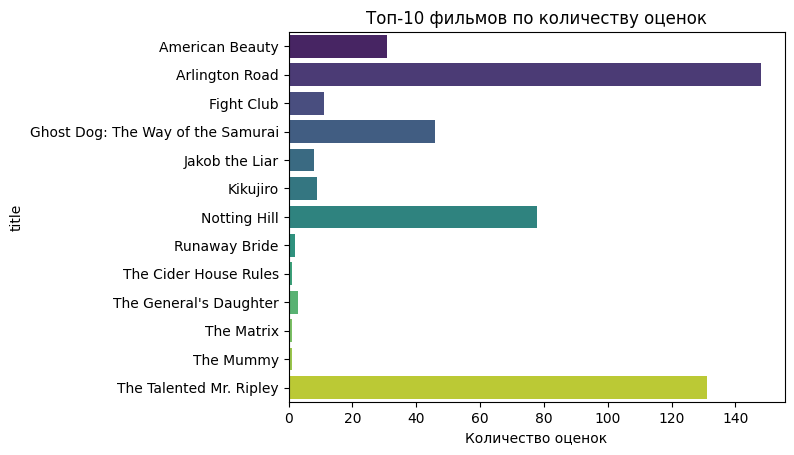

In [30]:
# Напишите свой код в данной ячейке
import seaborn as sns
import matplotlib.pyplot as plt

popular_movies = task4.groupby('title')['rating'].count()
top_movies = popular_movies.index
sns.barplot(x=popular_movies.values, y=top_movies, palette="viridis")
plt.title("Топ-10 фильмов по количеству оценок")
plt.xlabel("Количество оценок")
plt.show()

C:\Users\anani\AppData\Local\Temp\ipykernel_14592\1778475420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies.values, y=top_movies, palette="viridis")


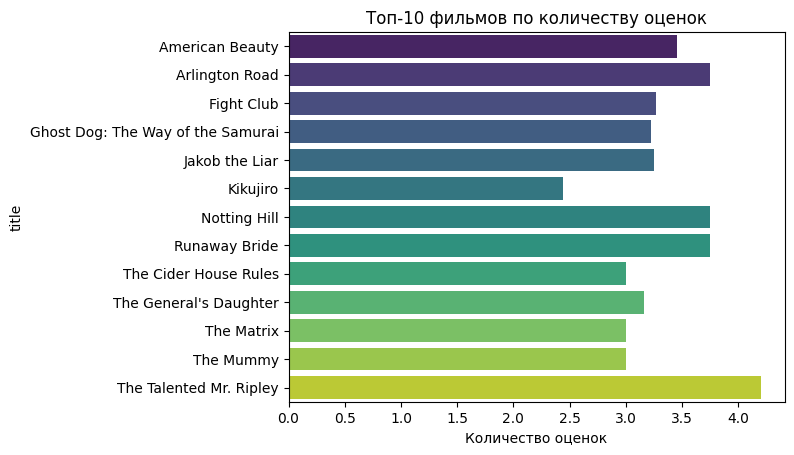

In [31]:
popular_movies = task4.groupby('title')['rating'].mean()
top_movies = popular_movies.index
sns.barplot(x=popular_movies.values, y=top_movies, palette="viridis")
plt.title("Топ-10 фильмов по количеству оценок")
plt.xlabel("Количество оценок")
plt.show()